<a href="https://colab.research.google.com/github/Pruthvik-Reddy/ipl_data_analysis_kaggle/blob/master/ipl_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
matches=pd.read_csv("/content/drive/My Drive/ipl_data_2008_2019/matches.csv")
deliveries=pd.read_csv("/content/drive/My Drive/ipl_data_2008_2019/deliveries.csv")
print(matches.shape)
print(deliveries.shape)

(756, 18)
(179078, 21)


In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [9]:
total_matches=matches.shape[0]
total_seasons=matches.season.unique()
print(total_matches)
print(total_seasons)

756
[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]


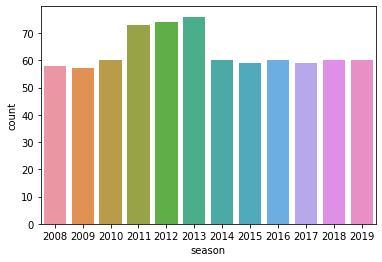

In [11]:
sns.countplot(x='season', data=matches)
plt.show()

In [13]:
matches.drop(["umpire3","dl_applied"],axis=1,inplace=True)
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals','Rising Pune Supergiants']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW',"DD","RPS"],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors',"Delhi Capitals",'Rising Pune Supergiants']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','DD',"RPS"],inplace=True)
matches.replace(["Rajiv Gandhi Intl. Cricket Stadium","Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium","M. Chinnaswamy Stadium","Feroz Shah Kotla Ground","IS Bindra Stadium"
                  ,"Maharashtra Cricket Association Stadium","Punjab Cricket Association Stadium, Mohali","MA Chidambaram Stadium, Chepauk"],
                ["Rajiv Gandhi International Stadium, Uppal","ACA-VDCA Stadium","M Chinnaswamy Stadium","Feroz Shah Kotla","Punjab Cricket Association IS Bindra Stadium, Mohali"
                ,"Subrata Roy Sahara Stadium","Punjab Cricket Association IS Bindra Stadium, Mohali","MA Chidambaram Stadium,Chepauk"],inplace=True)


KeyError: ignored

In [14]:
no_result_matches=matches[matches["result"]=="no result"].index
matches.drop(no_result_matches,inplace=True)
matches.shape

(752, 16)

field    460
bat      292
Name: toss_decision, dtype: int64


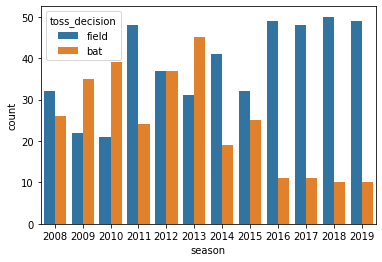

In [15]:

toss_decisions=matches['toss_decision'].value_counts()
print(toss_decisions)
sns.countplot(x='season',hue='toss_decision',data=matches)


52.26063829787234


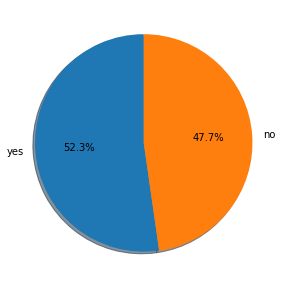

In [16]:
total,col=matches.shape
match_winners_after_winning_toss=matches[matches['toss_winner']==matches['winner']]
win,col=match_winners_after_winning_toss.shape
toss_win_match_win_percentage=(win/total)*100
print(toss_win_match_win_percentage)
slices=[toss_win_match_win_percentage,100-toss_win_match_win_percentage]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()



In [17]:
temp=deliveries[deliveries['is_super_over']==1]
temp2=temp["match_id"].nunique()
print("NUMBER OF SUPER OVERS ",str(temp2))

NUMBER OF SUPER OVERS  7


In [18]:
winners=matches[["winner"]].winner.value_counts()
print(winners)


MI      109
CSK     100
KKR      92
RCB      84
KXIP     82
DD       77
RR       75
SRH      58
DC       29
RPS      15
GL       13
PW       12
KTK       6
Name: winner, dtype: int64


In [19]:

teams_1=matches[["team1"]].team1.value_counts()
teams_2=matches[["team2"]].team2.value_counts()
total_matches=teams_1+teams_2
print(total_matches)
win_ratios=winners/total_matches
print(win_ratios)
win_ratios.shape
total_df=pd.DataFrame(win_ratios)


CSK     164
DC       75
DD      175
GL       30
KKR     178
KTK      14
KXIP    176
MI      187
PW       45
RCB     177
RPS      30
RR      145
SRH     108
dtype: int64
CSK     0.609756
DC      0.386667
DD      0.440000
GL      0.433333
KKR     0.516854
KTK     0.428571
KXIP    0.465909
MI      0.582888
PW      0.266667
RCB     0.474576
RPS     0.500000
RR      0.517241
SRH     0.537037
dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

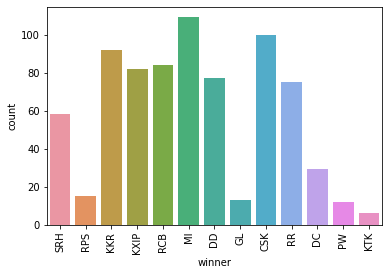

In [20]:
sns.countplot(x='winner',data=matches)
plt.xticks(rotation='vertical')

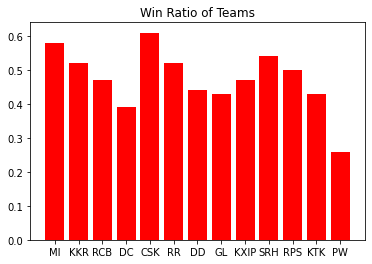

In [24]:
win_ratios={'MI':0.58,'KKR':0.52,'RCB':0.47,'DC':0.39,'CSK':0.61,'RR':0.52,'DD':0.44,'GL':0.43,'KXIP':0.47,'SRH':0.54,'RPS':0.5,'KTK':0.43,'PW':0.26}
keys, values = win_ratios.keys(), win_ratios.values()
plt.bar(range(len(values)), values, color='r')
plt.xticks(range(len(values)), keys)
plt.title("Win Ratio of Teams")
plt.show()

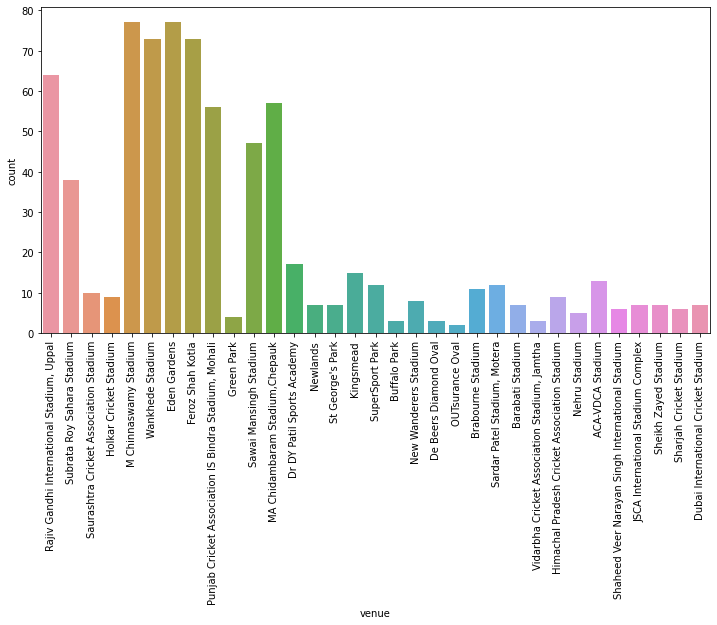

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
matches_2=matches
#matches_2.shape
newdf = matches_2[matches_2['season'] != 2009]
matches2=newdf[newdf['season'] != 2014]
matches2.shape


(635, 16)

In [28]:
#venues do not include the venues from Dubai and South Africa as the ipl was hosted overseas in that period
from collections import defaultdict
venues=matches2.venue.unique()
#venues.shape
#print(venues)
home_venues={
    'MI':"Wankhede Stadium",
    'KKR':"Eden Gardens",
    'RCB':"M Chinnaswamy Stadium",
    'DC':"Rajiv Gandhi International Stadium, Uppal",
    'CSK':"MA Chidambaram Stadium,Chepauk",
    'RR':"Sawai Mansingh Stadium",
    'DD':"Feroz Shah Kotla",
    'GL':"Saurashtra Cricket Association Stadium",
    'KXIP':"Punjab Cricket Association IS Bindra Stadium, Mohali",
    'SRH':"Rajiv Gandhi International Stadium, Uppal",
    'RPS':"Subrata Roy Sahara Stadium",
    'KTK':"Nehru Stadium",
    'PW':"Subrata Roy Sahara Stadium",
    
}
#print(len(matches2))
#print(home_venues)
#print(home_grounds)
indices=matches2[["id"]]
print(indices.shape)
#print(indices.loc[7,"id"])
#print(matches2.loc[1,"team1"])
teams_list=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
teams_homes=[home_venues['MI'],home_venues['KKR'],home_venues['RCB'],home_venues['DC'],home_venues['CSK'],home_venues['RR'],home_venues['DD'],home_venues['GL'],home_venues['KXIP'],
             home_venues['SRH'],home_venues['RPS'],home_venues['KTK'],home_venues['PW']]
teams_home_matches=[0,0,0,0,0,0,0,0,0,0,0,0,0]
teams_home_wins=[0,0,0,0,0,0,0,0,0,0,0,0,0]
data={
    "teams_list":teams_list,"teams_homes":teams_homes,"teams_home_matches":teams_home_matches,"teams_home_wins":teams_home_wins
}
#home_games=pd.DataFrame(data)
#print(home_games.shape)
for index, row in matches2.iterrows(): 
    venue_1=row["venue"]
    season_1=row["season"]
    index_1=-1
    for j in range(len(teams_homes)):
      if venue_1!="Rajiv Gandhi International Stadium, Uppal" and venue_1!="Subrata Roy Sahara Stadium":

        if teams_homes[j]==venue_1:
          index_1=j
      elif venue_1=="Rajiv Gandhi International Stadium, Uppal":
        if season_1<=2012:
          index_1=3
        else:
          index_1=9
      else:
        if season_1<2016:
          index_1=12
        elif season_1==2016 or season_1==2017:
          index_1=10
        elif season_1==2018:
          index_1=4
        else:
          continue


    if(index_1!=-1):
      teams_home_matches[index_1]+=1
    winner_1=row["winner"]
    index_2=teams_list.index(winner_1)
    if venue_1==teams_homes[index_2]:
      teams_home_wins[index_2]+=1
home_games=pd.DataFrame(data) 
print(home_games[["teams_home_matches","teams_home_wins"]])
print(home_games)

(635, 1)
    teams_home_matches  teams_home_wins
0                   67               38
1                   73               41
2                   71               35
3                   18                3
4                   63               40
5                   47               32
6                   68               31
7                   10                3
8                   53               28
9                   42               29
10                  11                5
11                   5                2
12                  21                4
   teams_list  ... teams_home_wins
0          MI  ...              38
1         KKR  ...              41
2         RCB  ...              35
3          DC  ...               3
4         CSK  ...              40
5          RR  ...              32
6          DD  ...              31
7          GL  ...               3
8        KXIP  ...              28
9         SRH  ...              29
10        RPS  ...               5
11        K

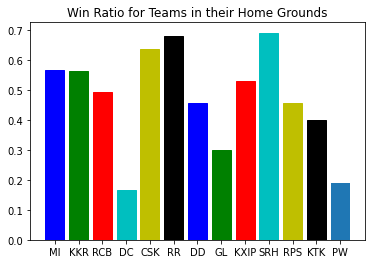

In [29]:
home_win_ratios={}
for i in range(len(teams_list)):
  home_win_ratios[teams_list[i]]=teams_home_wins[i]/teams_home_matches[i]

keys, values = home_win_ratios.keys(), home_win_ratios.values()
bar_list=plt.bar(range(len(values)), values)
bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
bar_list[3].set_color('c')
bar_list[4].set_color('y')
bar_list[5].set_color('k')
bar_list[6].set_color('b')
bar_list[7].set_color('g')
bar_list[8].set_color('r')
bar_list[9].set_color('c')
bar_list[10].set_color('y')
bar_list[11].set_color('k')
plt.xticks(range(len(values)), keys)
plt.title("Win Ratio for Teams in their Home Grounds")
plt.show()

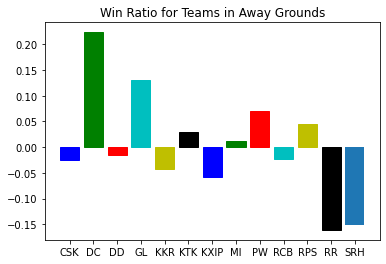

In [30]:
away_win_ratios={}
win_ratios=dict(sorted(win_ratios.items()))
home_win_ratios=dict(sorted(home_win_ratios.items()))
for key,value in win_ratios.items():
  away_win_ratios[key]=value-home_win_ratios[key]
keys, values = away_win_ratios.keys(), away_win_ratios.values()
bar_list=plt.bar(range(len(values)), values)
bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
bar_list[3].set_color('c')
bar_list[4].set_color('y')
bar_list[5].set_color('k')
bar_list[6].set_color('b')
bar_list[7].set_color('g')
bar_list[8].set_color('r')
bar_list[9].set_color('c')
bar_list[10].set_color('y')
bar_list[11].set_color('k')
plt.xticks(range(len(values)), keys)
plt.title("Win Ratio for Teams in Away Grounds")
plt.show()

In [31]:
venues={}
for index, row in matches.iterrows(): 
    venue=row["venue"]
    win_by_runs=row["win_by_runs"]
    win_by_wickets=row["win_by_wickets"]
    if venue not in venues:
      if win_by_runs==0 and win_by_wickets==0:
        continue
      if win_by_runs==0:
        venues[venue]=[1,1]
      else:
        venues[venue]=[1,0]
    else:
      if win_by_runs==0 and win_by_wickets==0:
        continue
      if win_by_runs==0:
        i,j=venues[venue]
        venues[venue]=i+1,j+1
      else:
        i,j=venues[venue]
        venues[venue]=i+1,j

print(venues)
bat_first_grounds={}
field_first_grounds={}
for i in venues:
  j,k=venues[i]
  if k>=j/2:
    bat_first_grounds[i]=(k/j)*100
  else:
    field_first_grounds[i]=(k/j)*100
print(bat_first_grounds)
print(field_first_grounds)

{'Rajiv Gandhi International Stadium, Uppal': (63, 35), 'Subrata Roy Sahara Stadium': (38, 20), 'Saurashtra Cricket Association Stadium': (9, 6), 'Holkar Cricket Stadium': (9, 8), 'M Chinnaswamy Stadium': (76, 43), 'Wankhede Stadium': (72, 37), 'Eden Gardens': (77, 45), 'Feroz Shah Kotla': (72, 37), 'Punjab Cricket Association IS Bindra Stadium, Mohali': (56, 32), 'Green Park': (4, 4), 'Sawai Mansingh Stadium': (47, 32), 'MA Chidambaram Stadium,Chepauk': (56, 22), 'Dr DY Patil Sports Academy': (17, 10), 'Newlands': (6, 2), "St George's Park": (7, 4), 'Kingsmead': (15, 6), 'SuperSport Park': (12, 8), 'Buffalo Park': (3, 1), 'New Wanderers Stadium': (8, 5), 'De Beers Diamond Oval': (3, 2), 'OUTsurance Oval': (2, 1), 'Brabourne Stadium': (11, 5), 'Sardar Patel Stadium, Motera': (11, 5), 'Barabati Stadium': (7, 3), 'Vidarbha Cricket Association Stadium, Jamtha': (3, 1), 'Himachal Pradesh Cricket Association Stadium': (9, 4), 'Nehru Stadium': (5, 2), 'ACA-VDCA Stadium': (13, 6), 'Shaheed Ve

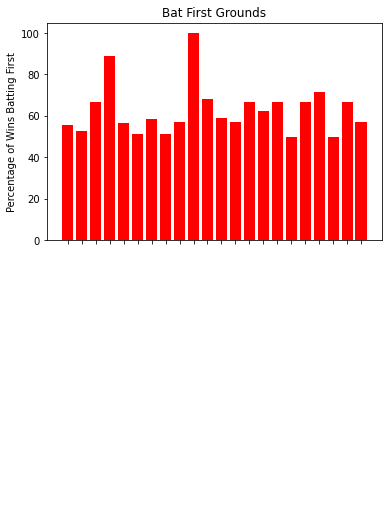

In [34]:
keys, values = bat_first_grounds.keys(), bat_first_grounds.values()
plt.bar(range(len(values)), values, color='r')
plt.xticks(range(len(values)), keys,rotation="vertical",color="w")
plt.title("Bat First Grounds")
plt.ylabel("Percentage of Wins Batting First")

plt.show()

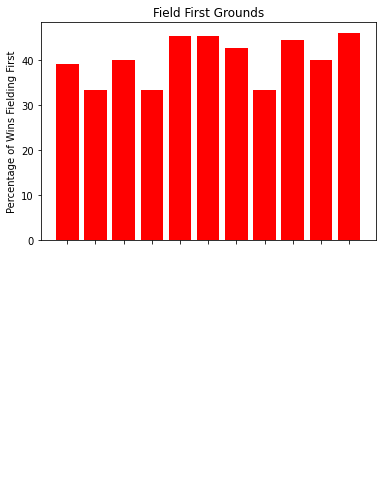

In [36]:
keys, values = field_first_grounds.keys(), field_first_grounds.values()
plt.bar(range(len(values)), values, color='r')
plt.xticks(range(len(values)), keys,rotation="vertical",color="w")
plt.title("Field First Grounds")
plt.ylabel("Percentage of Wins Fielding First")
plt.show()

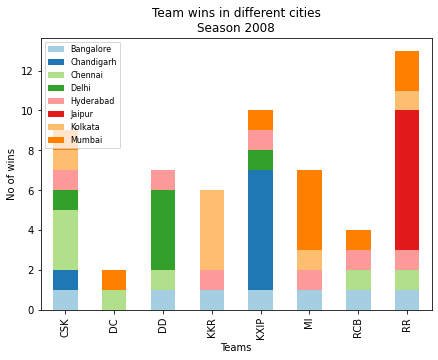

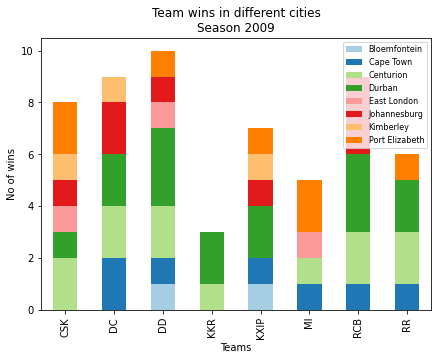

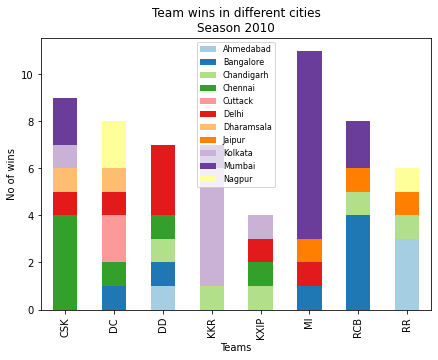

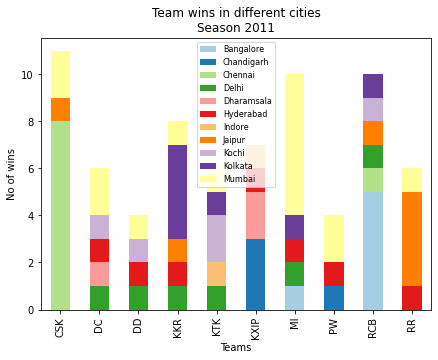

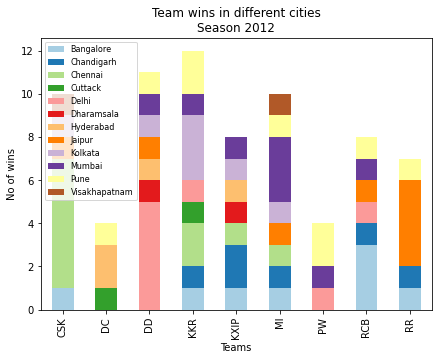

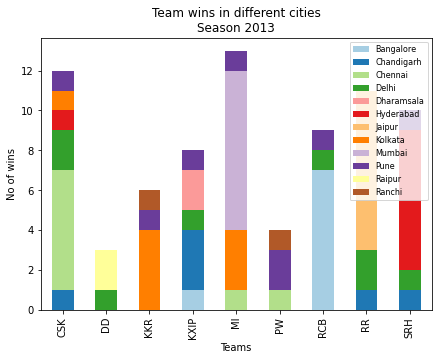

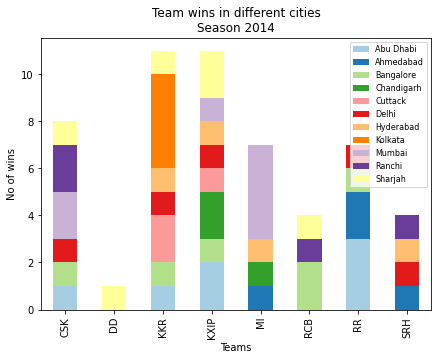

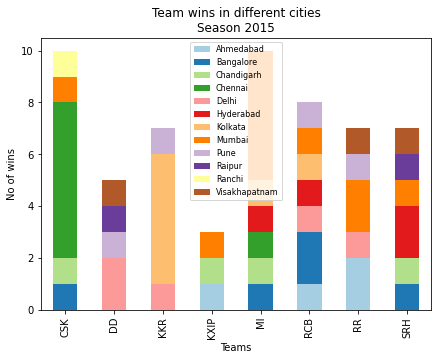

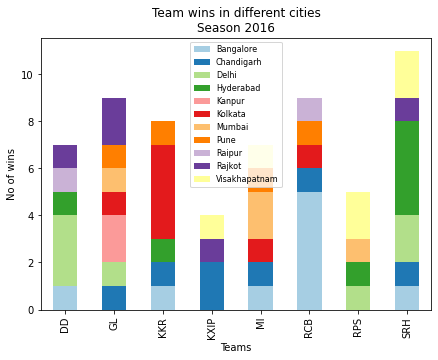

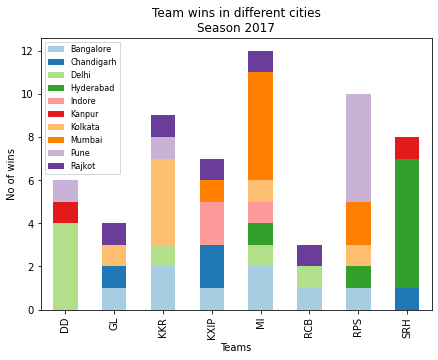

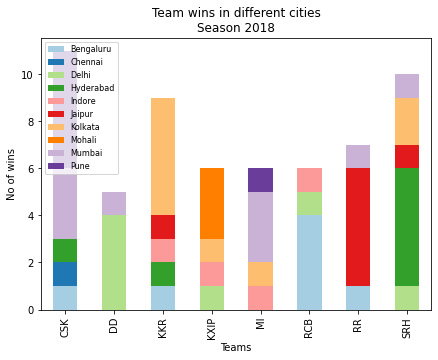

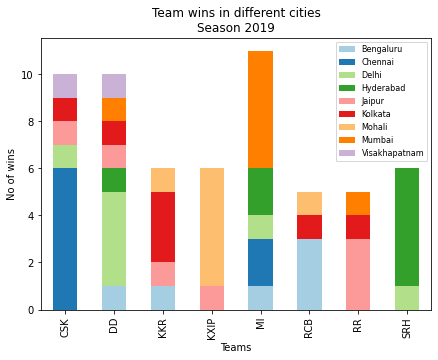

In [ ]:
matches_agg=matches
x, y = 2008, 2020
while x < y:
    wins_percity = matches_agg[matches_agg['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(matches_agg['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

In [37]:
bowler_grp = deliveries.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

del( bowlers["bye_runs"])
del( bowlers["legbye_runs"])
del( bowlers["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)

bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = matches[['id','season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2017,1,1,RCB,A Choudhary,4,3,1,55,4,1.0,13.75
1,2017,1,1,RCB,S Aravind,3,0,0,36,0,0.0,12.00


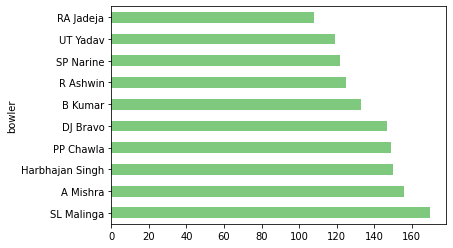

In [38]:
bowlers_wickets = bowlers.groupby(['bowler'])['wickets'].sum()
bowlers_wickets.sort_values(ascending = False, inplace = True)
bowlers_wickets[:10].plot(x= 'bowler', y = 'runs', kind = 'barh', colormap = 'Accent')

In [40]:
high_scores=deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores=high_scores[high_scores['total_runs']>=200]
ser = pd.Series(high_scores['inning'])
high_scores=high_scores.groupby(['inning','batting_team']).count().reset_index()
print(high_scores)

    inning batting_team  match_id  bowling_team  total_runs
0        1          CSK        11            11          11
1        1           DC         1             1           1
2        1           DD         6             6           6
3        1           GL         1             1           1
4        1          KKR         9             9           9
5        1         KXIP         9             9           9
6        1           MI        10            10          10
7        1          RCB        16            16          16
8        1           RR         5             5           5
9        1          SRH         8             8           8
10       2          CSK         6             6           6
11       2           DD         2             2           2
12       2          KKR         3             3           3
13       2         KXIP         6             6           6
14       2           MI         4             4           4
15       2          RCB         3       